In [3]:
##Week 6 Session :: PCA¶

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
##eigen decomposition 을 이용한 PCA

In [6]:
# generate toy dataset
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

X.shape

(60, 3)

In [8]:
# PCA를 수행하기 위해 먼저 공분산행렬을 구합니다.
X_cen = X - X.mean(axis=0)  # scaling
X_cov = np.dot(X_cen.T, X_cen) / 59 # covariance matrix

print(X_cov)

[[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]


In [9]:
# 다음으로 공분산행렬 X_cov에 대하여 eigenvalue와 eigenvector를 구합니다.
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :', v)

eigenvalue : [0.77830975 0.1351726  0.01034272]
eigenvector : [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]


In [10]:
# 마지막으로 데이터에 대한 eigenvector들의 설명력을 확인합니다.
print('explained variance ratio :', w / w.sum())

explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [11]:
##Singular Value Decomposition을 이용한 PCA

In [12]:
# generate toy dataset
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

X.shape

(60, 3)

In [13]:
# PCA를 수행하기 위해 먼저 데이터셋 X를 스케일링 합니다.
X_cen = X - X.mean(axis=0)  # scaling

print(X[0:5])
print(X_cen[0:5])

[[-1.01570027 -0.55091331 -0.26132626]
 [-0.00771675  0.59958572  0.03507755]
 [-0.95317135 -0.46453691 -0.24920288]
 [-0.92012304  0.21009593  0.02182381]
 [-0.76309739  0.158261    0.19152496]]
[[-1.03976771e+00 -7.60238460e-01 -3.32880482e-01]
 [-3.17841939e-02  3.90260570e-01 -3.64766659e-02]
 [-9.77238797e-01 -6.73862060e-01 -3.20757101e-01]
 [-9.44190485e-01  7.70779228e-04 -4.97304144e-02]
 [-7.87164831e-01 -5.10641487e-02  1.19970744e-01]]


In [14]:

# 다음으로 X_cen에 대하여 singular value와 singular vector를 구합니다.
U, D, V_t = np.linalg.svd(X_cen)

print('singular value :', D)
print('singular vector :\n', V_t.T)

singular value : [6.77645005 2.82403671 0.78116597]
singular vector :
 [[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


In [15]:
# 마지막으로 설명력을 확인합니다.
print('explained variance ratio :', D ** 2 / np.sum(D**2))

explained variance ratio : [0.84248607 0.14631839 0.01119554]


In [16]:
##Week 6 LAB :: PCA & FA

In [17]:
# load iris dataset
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])
df['target'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
df.shape

(150, 5)

In [19]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
##Principal Component Analysis

In [21]:
# 먼저 scaling을 실시합니다.
# Transform scales onto unit scale (mean=0 and variance=1)
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df.loc[:, features].values
y = df.loc[:, ['target']].values

X = StandardScaler().fit_transform(X) # Standardization using Standard Scaler
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [22]:
pd.DataFrame(data=X, columns=features).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [23]:
# 다음으로 공분산행렬을 구합니다.
covariance_matrix = np.cov(X.T)

print(covariance_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [24]:
# 공분산행렬에 대하여 eigenvalue와 eigenvector를 구합니다.
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

print('eigenvalue :', eig_vals) # eigen values
print('eigenvector :', eig_vecs) # eigen vectors

eigenvalue : [2.93808505 0.9201649  0.14774182 0.02085386]
eigenvector : [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [25]:
# PCA를 진행합니다.
pca = PCA(n_components=2) # PCA 선언 : 2차원으로 차원 축소 => 제1주성분, 제2주성분 총 2개의 주성분 반환
X_pca = pca.fit_transform(X) # PCA 적합

df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca = pd.concat([df_pca, df[['target']]], axis=1)

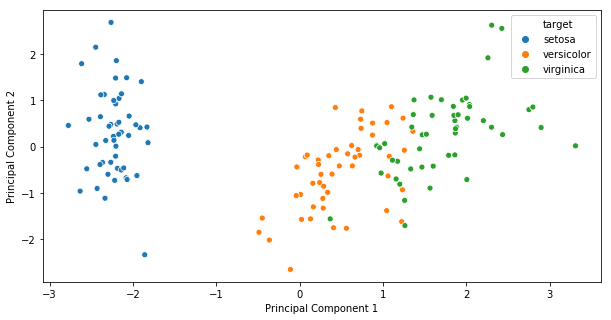

In [28]:
# PCA 결과를 시각화를 통해 확인합니다.
plt.figure(figsize=(10, 5))
sns.scatterplot(x = df_pca['Principal Component 1'], y = df_pca['Principal Component 2'], hue = df['target'])

In [29]:
# 주성분들의 설명력을 확인합니다.
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

PC1은 데이터를 약 72% 정도, PC2는 23% 정도 설명합니다

In [30]:
##Factor Analaysis: scikit-learn의 FactorAnalysis 이용

In [31]:
# Create factor analysis object and perform factor analysis
X = df.loc[:, features].values
fa = FactorAnalysis(n_components=10)
X_fa = fa.fit_transform(X)

In [32]:
df_fa = pd.DataFrame(data=X_fa, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df_fa.head()

,Factor1,Factor2,Factor3,Factor4
0,-1.226043,0.269089,0.0,0.0
1,-1.232343,-0.201804,0.0,0.0
2,-1.330547,-0.109966,0.0,0.0
3,-1.302661,-0.235704,0.0,0.0
4,-1.263690,0.312552,0.0,0.0


Factor1 & Factor2만 유의미

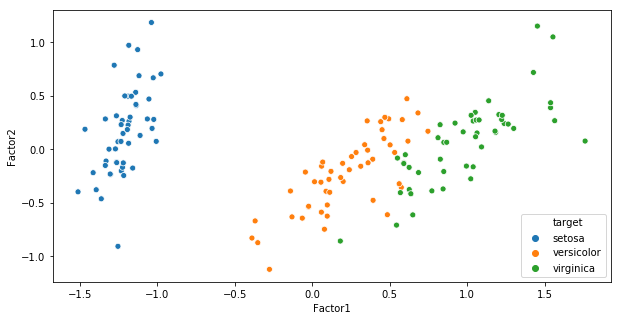

In [33]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = df_fa['Factor1'], y = df_fa['Factor2'], hue=df['target'])

In [34]:
##Factor Analysis: factor_analyzer의 FactorAnalyzer 이용

In [42]:
# Import the required modules
import pandas as pd
import sklearn.datasets
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [41]:
pip install factor-analyzer

  Stored in directory: C:\Users\PC\AppData\Local\pip\Cache\wheels\4a\d0\57\f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer
Note: you may need to restart the kernel to use updated packages.


In [75]:
# Import the dataset
fpath = './bfi.csv'
df = pd.read_csv(fpath, index_col=0)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [76]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 61623 to 67560
Data columns (total 28 columns):
A1           2236 non-null float64
A2           2236 non-null float64
A3           2236 non-null float64
A4           2236 non-null float64
A5           2236 non-null float64
C1           2236 non-null float64
C2           2236 non-null float64
C3           2236 non-null float64
C4           2236 non-null float64
C5           2236 non-null float64
E1           2236 non-null float64
E2           2236 non-null float64
E3           2236 non-null float64
E4           2236 non-null float64
E5           2236 non-null float64
N1           2236 non-null float64
N2           2236 non-null float64
N3           2236 non-null float64
N4           2236 non-null float64
N5           2236 non-null float64
O1           2236 non-null float64
O2           2236 non-null int64
O3           2236 non-null float64
O4           2236 non-null float64
O5           2236 non-null float64
gender       22

In [77]:
# create a factor analyzer variable and perform factor analysis
fa = FactorAnalyzer(n_factors=6, rotation='varimax')

In [78]:
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=6, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [79]:
# get the eigenvectors and eigenvalues
ev, v = fa.get_eigenvalues()

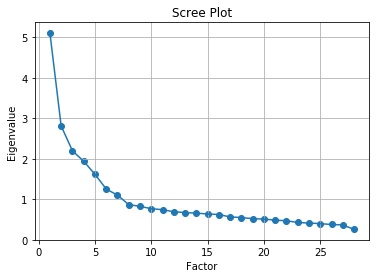

In [80]:
# Do a scree plot
xvals = range(1, df.shape[1]+1)

plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [81]:
##Week6 HW
#wine dataset을 활용하여 PCA 혹은 FA를 적용한 후, 적용하기 전과 적용한 후 분류모델의 성능을 비교해주세요

In [104]:
# Import the dataset
 
df = pd.read_csv('Wine.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [105]:
df.columns = ['name'
              ,'alcohol'
              ,'malicAcid'
              ,'ash'
              ,'ashalcalinity'
              ,'magnesium'
              ,'totalPhenols'
              ,'flavanoids'
              ,'nonFlavanoidPhenols'
              ,'proanthocyanins'
              ,'colorIntensity'
              ,'hue'
              ,'od280_od315'
              ,'proline'
                ]
df.head()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
name                   178 non-null int64
alcohol                178 non-null float64
malicAcid              178 non-null float64
ash                    178 non-null float64
ashalcalinity          178 non-null float64
magnesium              178 non-null int64
totalPhenols           178 non-null float64
flavanoids             178 non-null float64
nonFlavanoidPhenols    178 non-null float64
proanthocyanins        178 non-null float64
colorIntensity         178 non-null float64
hue                    178 non-null float64
od280_od315            178 non-null float64
proline                178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [107]:
##Factor Analysis

# create a factor analyzer variable and perform factor analysis
fa = FactorAnalyzer(n_factors=13, rotation='varimax')

In [108]:
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=13, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [111]:
# get the eigenvectors and eigenvalues
ev, v = fa.get_eigenvalues()
print('eigenvalue :', ev) # eigen values
print('eigenvector :', v) # eigen vectors

eigenvalue : [5.53594804 2.49707625 1.44607422 0.92791783 0.87750252 0.67277834
 0.55379896 0.35003417 0.29454194 0.2623061  0.22584842 0.16879672
 0.12956418 0.05781232]
eigenvector : [ 5.38856083e+00  2.31388251e+00  1.26377143e+00  6.86496451e-01
  5.11152903e-01  4.16205053e-01  2.41368354e-01  1.46164108e-01
  1.08997127e-01  7.64567586e-02  4.50870766e-02  2.75278663e-02
  4.40922331e-03 -1.15965101e-06]


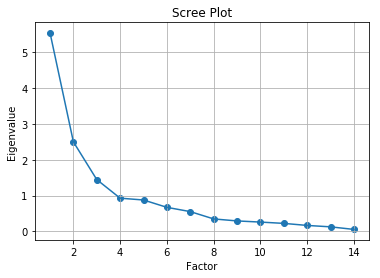

In [112]:
# Do a scree plot
xvals = range(1, df.shape[1]+1)

plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [94]:
##PCA
# Import the dataset
 
df = pd.read_csv('Wine.csv',header=None)

df.columns = ['name'
              ,'alcohol'
              ,'malicAcid'
              ,'ash'
              ,'ashalcalinity'
              ,'magnesium'
              ,'totalPhenols'
              ,'flavanoids'
              ,'nonFlavanoidPhenols'
              ,'proanthocyanins'
              ,'colorIntensity'
              ,'hue'
              ,'od280_od315'
              ,'proline'
                ]
df.head()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [113]:
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=4, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [114]:
ev, v = fa.get_eigenvalues()
print('eigenvalue :', ev) 
print('eigenvector :', v)

eigenvalue : [5.53594804 2.49707625 1.44607422 0.92791783 0.87750252 0.67277834
 0.55379896 0.35003417 0.29454194 0.2623061  0.22584842 0.16879672
 0.12956418 0.05781232]
eigenvector : [ 5.26634023  2.19641814  1.25145162  0.56473308  0.2612129   0.18910493
  0.05266112  0.0202376  -0.00928546 -0.02032875 -0.03413822 -0.07288214
 -0.17641181 -0.21546918]


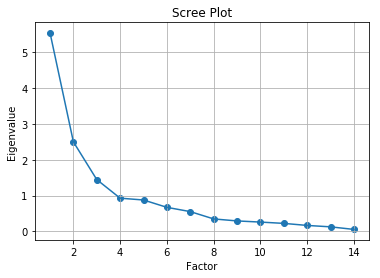

In [115]:
# Do a scree plot
xvals = range(1, df.shape[1]+1)

plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [117]:
fa.loadings_

array([[-0.61199249, -0.37830115,  0.61526399,  0.09076879],
       [ 0.12753327,  0.77911113,  0.12890171, -0.04311621],
       [-0.25270574, -0.00356822,  0.49305749,  0.16096148],
       [ 0.02995749,  0.3210134 ,  0.02741901,  0.94738057],
       [-0.19399726, -0.37508733,  0.28995031,  0.59710842],
       [ 0.18098556,  0.37464797, -0.00125688,  0.13431408],
       [ 0.803817  ,  0.27032728, -0.23552398,  0.02302648],
       [ 0.87459374,  0.21832589, -0.35880371,  0.01750569],
       [-0.50254969, -0.1501697 ,  0.19552546,  0.24442012],
       [ 0.67973353,  0.12951939, -0.07730581, -0.02271446],
       [-0.12449198,  0.59840257,  0.5997329 ,  0.06004445],
       [ 0.30326415, -0.03450754, -0.77779949, -0.03873566],
       [ 0.72883209, -0.00337076, -0.47861501, -0.01579003],
       [ 0.28263562,  0.82315273, -0.22676934, -0.03341199]])

In [95]:
##FA
# check for null value
df.isnull().sum()

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

In [96]:
#Scaling
features = ['alcohol'
              ,'malicAcid'
              ,'ash'
              ,'ashalcalinity'
              ,'magnesium'
              ,'totalPhenols'
              ,'flavanoids'
              ,'nonFlavanoidPhenols'
              ,'proanthocyanins'
              ,'colorIntensity'
              ,'hue'
              ,'od280_od315'
              ,'proline']
X = df.loc[:, features].values
y = df.loc[:, ['name']].values

X = StandardScaler().fit_transform(X) # Standardization using Standard Scaler
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [97]:
pd.DataFrame(data=X, columns=features).head()

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [98]:
# 다음으로 공분산행렬을 구합니다.
covariance_matrix = np.cov(X.T)

print(covariance_matrix)

[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 [ 0.23815287 -0.413328

In [99]:
# 공분산행렬에 대하여 eigenvalue와 eigenvector를 구합니다.
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

print('eigenvalue :', eig_vals) # eigen values
print('eigenvector :', eig_vecs) # eigen vectors

eigenvalue : [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]
eigenvector : [[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634    0.13075693  0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.394660

가장 큰 고유값인 4.73243698을 갖는 eigen vector가 제 1주성분

In [101]:
# PCA를 진행합니다.
pca = PCA(n_components=2) # PCA 선언 : 2차원으로 차원 축소 => 제1주성분, 제2주성분 총 2개의 주성분 반환
X_pca = pca.fit_transform(X) # PCA 적합

df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca = pd.concat([df_pca, df[['name']]], axis=1)

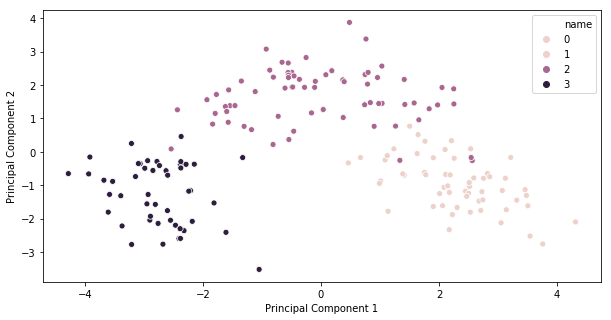

In [102]:
# PCA 결과를 시각화를 통해 확인합니다.
plt.figure(figsize=(10, 5))
sns.scatterplot(x = df_pca['Principal Component 1'], y = df_pca['Principal Component 2'], hue = df['name'])

In [103]:
# 주성분들의 설명력을 확인합니다.
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

PC1은 데이터를 약 36% 정도, PC2는 19% 정도 설명합니다.

In [121]:
data = pd.read_csv('Wine.csv',header=0)
X= data.data
y= data.target
feature_names = data.feature_names
print(data.target_names)
print(data.feature_names)

AttributeError: 'DataFrame' object has no attribute 'data'

In [163]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [124]:
data=datasets.load_wine()

In [128]:
X=data.data  #독립변수
y=data.target  #종속변수
feature_names = data.feature_names
print('targets=',data.target_names)
print('features=',data.feature_names)

targets= ['class_0' 'class_1' 'class_2']
features= ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [135]:
#Train / Test 로 데이터분류
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#모델 생성
model=LogisticRegression(max_iter=2000,random_state=0,multi_class='multinomial',solver='sag')
model.fit(x_train,y_train)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [137]:
pred=model.predict(x_test)
print(accuracy_score(y_test,pred))

0.9722222222222222


적용 전 분류모델 성능은 97%의 정확도를 가진다. (모델 적용 자체는 매우 잘 됨)

In [138]:
##PCA
#Scaling
X = StandardScaler().fit_transform(X) # Standardization using Standard Scaler
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [157]:
pd.DataFrame(data=X, columns=features).head()

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [139]:
# 다음으로 공분산행렬을 구합니다.
covariance_matrix = np.cov(X.T)

print(covariance_matrix)

[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 [ 0.23815287 -0.413328

In [140]:
# 공분산행렬에 대하여 eigenvalue와 eigenvector를 구합니다.
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

print('eigenvalue :', eig_vals) # eigen values
print('eigenvector :', eig_vecs) # eigen vectors

eigenvalue : [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]
eigenvector : [[-0.1443294   0.48365155  0.20738262 -0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093 -0.08901289  0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881 -0.6262239  -0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905  -0.61208035  0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634   -0.13075693 -0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.394660

In [158]:
# PCA를 진행합니다.
pca = PCA() # PCA 선언 :
X_pca = pca.fit_transform(X) # PCA 적합



In [152]:
#PCA 결과를 시각화를 통해 확인합니다.
plt.figure(figsize=(10, 5))
sns.scatterplot(x = df_pca['Principal Component 1'], y = df_pca['Pincipal Component 2'], hue = df['target'])

KeyError: 'Principal Component 1'

<Figure size 720x360 with 0 Axes>

In [160]:
# 주성분들의 설명력을 확인합니다.
PC_ratio=pca.explained_variance_ratio_
PC_ratio


array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

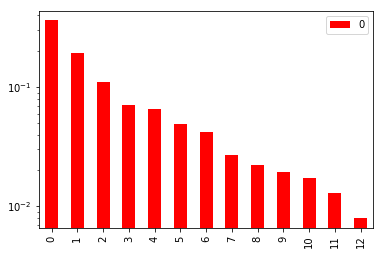

In [161]:
# 주성분들의 설명력 시각화
PC_ratio_df = pd.DataFrame(PC_ratio)
PC_ratio_df.plot(kind='bar',logy=True,color='r')

In [167]:
# train data만 가지고 pca 생성
pca=PCA()
pca.fit(x_train)
train_score =pca.transform(x_train)
test_score = pca.transform(x_test)

In [168]:
#모델 생성
#pca 적용하지 않은 데이터와 적용한 데이터에 동일하게 적용할 로지스틱회귀모델 생성

model2 = LogisticRegression(max_iter=2000, random_state=0,
                        multi_class='multinomial', 
                        solver='sag')

In [170]:
model.fit(x_train, y_train)
pred = model.predict(x_test)
cf1 = confusion_matrix(y_test, pred)
print(cf1)
print(accuracy_score(y_test, pred))

model2.fit(train_score, y_train)
pred2 = model2.predict(test_score)
cf2 = confusion_matrix(y_test, pred2)
print(cf2)
print(accuracy_score(y_test, pred2))

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[[13  1  0]
 [ 0 16  0]
 [ 0  0  6]]
0.9722222222222222
[[13  1  0]
 [ 0 16  0]
 [ 0  0  6]]
0.9722222222222222


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


별 차이 없음!!

PCA가 반드시 모델의 성능을 높여주는 것은 아니다. 하지만, 빠르게 필요 없는 feature들을 없애고 핵심적인 feature 들만을 뽑아서 모델을 만드는 것에는 유용할 것이다.

 